## ICE-13. Audio Features - 3 (100 points)
Please download the input audio from the following link:<br> https://drive.google.com/file/d/1VzVMDZdMQatbEpEqkYFeBakLci4z1ttW/view?usp=share_link <br><br>

In [1]:
!pip install torchaudio==0.12.1
!pip install transformers
!ls *.wav

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ICE-13.wav


# Question 1 (10 points)

### What is Word Error Rate (WER) ? Explain briefly .

## Answer Here 
WER (Word error rate) is the percentage of the proportion of text derived from the speech to the actual text in the Audio.

 WER= ( S + D + I ) / N
 Where  D : deleted word, S: Substituted word, I: additional insertion and N : Number of words.

# Question 2 (20 points)

- Give an example for WER . (10 points)

- Calculate WER for the example from formula given in lecture . (10 points)

### Please dont use same example given in lecture (If used will be awarded 0 ) 

## Answer Here 
Let us consider a Example, Actual Sentence : The monkey is hanging on the cable , Output is : The monkey is on the table.

WER Calculation : 
D = 1 , S = 0 , I = 1 and N = 7  ; 
WER = (0 + 1 + 1) / 6 = 0.28


# Question 3 (20 points)

### Please list atleast 2 algorithms commonly used by Speech-to-Text and NLP applications to enhance predictions. Briefly explain each one of them and their impact in Speech to text .

- Each algorithm is awarded with 10 points . Max 20 points .


## Answer Here 
1. Beam Search Algorithm:It is a updated bfs algorithm which works on conditional probability.The beam search method can have many routs which are chosen according to the length of the path. therefore it is used in finding the cheapest path.

2. Greedy Search : It tries to choose the best outcome in the given scenario at each moment without knowing the output of the fuuture result. It will try to find out the best output in the entire problem.

## Task 1 (10 points)

- Visualize above audio file  (x axis : time, y axis : amplitude)

In [2]:
#code here 
# Downloading the data
!gdown 1VzVMDZdMQatbEpEqkYFeBakLci4z1ttW

Downloading...
From: https://drive.google.com/uc?id=1VzVMDZdMQatbEpEqkYFeBakLci4z1ttW
To: /content/ICE-13.wav
100% 249k/249k [00:00<00:00, 85.3MB/s]


In [3]:
# Importing required libraries
from matplotlib import pyplot as plt
import torchaudio
from scipy.io import wavfile
from IPython import display
import torch
import numpy as np
assert torch.__version__.startswith('1.12'), 'Please, install torch>=1.12'
assert torchaudio.__version__.startswith('0.12'), 'Please, install torchaudio>=0.12'
import librosa

In [4]:
# Loading the File
Data,Samp_Rate=librosa.load('/content/ICE-13.wav')

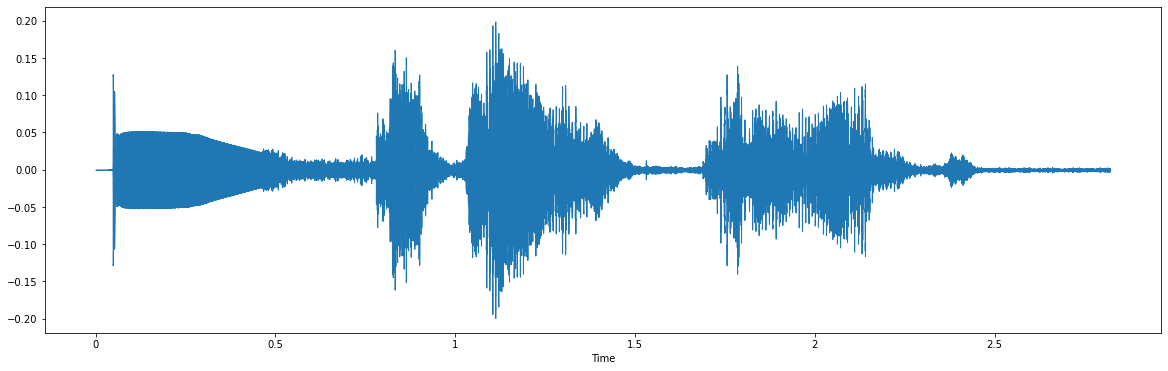

In [5]:
#Visualizing the audio file (x axis : time, y axis : amplitude)
import librosa.display
plt.figure(figsize=(20,6))
librosa.display.waveshow(Data, sr=Samp_Rate)

## Task 2 (20 points)

- Use above audio file i.e (ICE-13.wav)
- Import a pretrained model  (10 points) [**Hint** - Wav2Vec2ForCTC, Wav2Vec2Tokenizer ]

- Print sampling rate of the audio (10 points)

###Sample Rate =  16000

In [1]:
#code here

# Importing required Libraries
import librosa
from transformers import Wav2Vec2ForCTC,Wav2Vec2Tokenizer
data,Samp_Rate=librosa.load('/content/ICE-13.wav', sr = 16000)

#Sample Rate
print(Samp_Rate)

16000


## Task 3 (20 points)

- Use above audio file i.e (ICE-13.wav)
- Use the pretained model used above and convert speech to text . (10 points)
- Print the convereted text without fail (10 points)

In [2]:
#code here

name = "facebook/wav2vec2-base-960h"
tokenizer = Wav2Vec2Tokenizer.from_pretrained(name)
model = Wav2Vec2ForCTC.from_pretrained(name)

input_values = tokenizer(data, return_tensors = "pt").input_values

#PREDICTING NON LINEAR VALUES 
logits = model(input_values).logits

# Passing through softmax for prediction ID'S
import torch
prediction = torch.argmax(logits, dim = -1)

# Passing the prediction to the tokenizer for decoding.
transcription = tokenizer.batch_decode(prediction)[0]

Downloading:   0%|          | 0.00/291 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/163 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
/usr/local/lib/python3.8/dist-packages/transformers/models/wav2vec2/tokenization_wav2vec2.py:752: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in version 5 of Transformers. Please use `Wav2Vec2Processor` or `Wav2Vec2CTCTokenizer` instead.
  warnings.warn(


Downloading:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
# Text output
print(transcription)

DEEP LEARNING IS AMAZINGE


###Sample rate : 22050

In [4]:
import librosa
from transformers import Wav2Vec2ForCTC,Wav2Vec2Tokenizer
data,Samp_Rate=librosa.load('/content/ICE-13.wav')

#Sample Rate
print(Samp_Rate)

22050


In [5]:
name = "facebook/wav2vec2-base-960h"
tokenizer = Wav2Vec2Tokenizer.from_pretrained(name)
model = Wav2Vec2ForCTC.from_pretrained(name)

input_values = tokenizer(data, return_tensors = "pt").input_values

#PREDICTING NON LINEAR VALUES 
logits = model(input_values).logits

# Passing through softmax for prediction ID'S
import torch
prediction = torch.argmax(logits, dim = -1)

# Passing the prediction to the tokenizer for decoding.
transcription = tokenizer.batch_decode(prediction)[0]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
# Text output
print(transcription)

G FLORINI IS UMEASY
